In [1]:
from collections import Counter
import pandas as pd
from datetime import datetime
import numpy as np
import json
from matplotlib import pyplot as plt
import spacy

Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [2]:
def freq_word(s: str):
    token_freq = dict(Counter(s.split()))
    max_val = max(token_freq.values())
    result = [len(key) for key, val in token_freq.items() if val == max_val]
    return sorted(result)[-1]
print(freq_word("write write write all the number from from from 1 to 100"))
print(freq_word("a a bb bb"))
print(freq_word("a bb bb"))

5
2
2


Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [3]:
def valid_str(s: str):
    token_freq = dict(Counter(s))
    unique_counts = set(token_freq.values())
    result = "invalid"
    if len(unique_counts) == 1:
        result = "valid"
    return result
print(valid_str("aabbcc"))
print(valid_str("aabbc"))
print(valid_str("abc"))

valid
invalid
valid


Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

In [4]:
json_ = pd.read_json("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json", typ="series")
df = pd.DataFrame(json_[0])
df.to_excel("pokemon.xlsx", index=False)
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json

In [5]:
df = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json", typ="frame")
df.dropna(axis=1, how="all", inplace=True)
df = df.loc[:, df.columns[:-2]].copy()
df.to_csv("nasa.csv", index=False)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

In [6]:
init_df = pd.read_json("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes", typ="series", convert_axes=True)
df = pd.DataFrame(init_df['_embedded']['episodes']).copy()

def parse_date(s: str):
    try:
        s = str(s)
        date = datetime.strptime(s, "%Y-%m-%d")
    except:
        date = None
    return date


def parse_time(s):
    s = str(s)
    if s.count(":") > 0:
        return datetime.strptime(s, "%H:%M").strftime("%I:%M %p")
    else:
        return None


def get_medium_image_link(d):
    return d.get('medium')


def get_original_image_link(d):
    return d.get('original')


df1 = df[['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'rating', 'image', 'summary']].copy()

df1['airdate'] = df1['airdate'].map(parse_date)

df1['airtime'] = df1['airtime'].map(parse_time)


df1['medium_image_link'] = df1['image'].map(get_medium_image_link)
df1['original_image_link'] = df1['image'].map(get_original_image_link)


df1['average_rating'] = df1['rating'].map(lambda d: d.get('average'))

df1['summary'] = df1['summary'].replace("<.*?>", "", regex=True)

final_df = df1[['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average_rating', 'summary', 'medium_image_link', 'original_image_link']].copy()


final_df.to_csv('tvmaze.csv', index=False)
final_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.

In [7]:
# Daa ingestion
df = pd.read_excel("pokemon.xlsx")

Get all Pokemons whose spawn rate is less than 5%

In [8]:
df.loc[df["spawn_chance"] < 0.05, :]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


Get all Pokemons that have less than 4 weaknesses

In [9]:
# def weakness_count(s: str):
#     s = s.replace("[", "")
#     s = s.replace("]", "")
#     l = s.split(", ")
#     return len(list(l))

## METHOD 2 - SIMPLE
def weakness_count(s: str):
    return (s.count("', ") + 1)

df['weakness_count'] = df['weaknesses'].map(weakness_count)
df.loc[df["weakness_count"] < 4, :]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",3
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN,3
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.8399999999999999]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,3


Get all Pokemons that have no multipliers at all

In [10]:
df.loc[((df['multipliers'].isna()) | (df['multipliers'].isnull())), :]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",3
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",2
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"['Bug', 'Flying']",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,0.0220,2.20,05:23,NaN,"['Fire', 'Electric', 'Ice', 'Flying', 'Rock']",NaN,"[{'num': '010', 'name': 'Caterpie'}, {'num': '...",5
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"['Bug', 'Poison']",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,0.0510,5.10,04:50,NaN,"['Fire', 'Flying', 'Psychic', 'Rock']",NaN,"[{'num': '013', 'name': 'Weedle'}, {'num': '01...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Ice', 'Rock']",NaN,NaN,2
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN,3
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",4
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,3


Get all Pokemons that do not have more than 2 evolutions

In [11]:
def evolution_count(s: str):
    return (str(s).count("'num': "))

df['prev_evolution_count'] = df['prev_evolution'].map(evolution_count)
df['next_evolution_count'] = df['next_evolution'].map(evolution_count)
df['total_evolution_count'] = df['prev_evolution_count'] + df['next_evolution_count']
df.loc[df["total_evolution_count"] <= 2, :]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count,prev_evolution_count,next_evolution_count,total_evolution_count
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,69.00,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,0,2,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,1,1,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,2,0,2
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,0,2,2
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,30.00,06:41,"[1.83, 1.8399999999999999]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3,0,2,2
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3,1,1,2
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",4,2,0,2
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,3,0,0,0


Get all Pokemons whose spawn time is less than 300 seconds.

In [12]:
def compute_time(s: str):
    s = str(s)
    if s.count(":") > 0:
        mins, secs = s.split(":")
        return (int(mins) * 60 + int(secs))
    else:
        return 0
    
df['spawn_time_secs'] = df['spawn_time'].map(compute_time)
df.loc[df['spawn_time_secs'] < 300, :]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count,prev_evolution_count,next_evolution_count,total_evolution_count,spawn_time_secs
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,04:25,[2.1],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2,0,2,2,265
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,00:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",2,2,0,2,6
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,50.0,Not in Eggs,...,02:11,"[3.55, 3.79]","['Fire', 'Flying', 'Rock']","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",3,1,1,2,131
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,...,02:21,"[1.01, 1.09]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",NaN,4,0,2,2,141
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,50.0,Not in Eggs,...,02:30,"[3.01, 3.41]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",4,1,1,2,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,144,144,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"['Ice', 'Flying']",1.70 m,55.4 kg,None,NaN,Not in Eggs,...,NaN,NaN,"['Fire', 'Electric', 'Rock', 'Steel']",NaN,NaN,4,0,0,0,0
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,NaN,NaN,"['Ice', 'Rock']",NaN,NaN,2,0,0,0,0
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN,3,0,0,0,0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,3,0,0,0,0


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations

In [13]:
df = pd.read_csv("nasa.csv", parse_dates=True,infer_datetime_format=True)

def date_parser(s: str):
    s = str(s)
    year = None
    if s.count("-") == 2:
        if s[4] == "-":
            year = int(s[:4])
    return year

df['parsed_year'] = df['year'].map(date_parser)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,parsed_year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902.0


Get all the Earth meteorites that fell before the year 2000

In [14]:
df.loc[df['parsed_year'] < 2000, :]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,parsed_year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902.0
...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",1807.0
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",1934.0
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869.0
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",1922.0


Get all the earth meteorites co-ordinates who fell before the year 1970

In [15]:
def get_coordinates(d):
    d = str(d)
    if d.count("{"):
        d = json.loads(str(d).replace("'", '"')).get('coordinates')
    else:
        d = None
    return d

df.loc[df['parsed_year'] < 1970, 'geolocation'].map(get_coordinates)

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: geolocation, Length: 780, dtype: object

Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [16]:
df.loc[df['mass'] > 10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,parsed_year
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952.0
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44....",1814.0
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01T00:00:00.000,19.08333,8.38333,"{'type': 'Point', 'coordinates': [8.38333, 19....",1925.0
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01T00:00:00.000,39.91667,42.81667,"{'type': 'Point', 'coordinates': [42.81667, 39...",1981.0
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01T00:00:00.000,45.26667,10.15000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",1883.0
...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.60000,17.11667,"{'type': 'Point', 'coordinates': [17.11667, 49...",1878.0
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.20000,-89.68333,"{'type': 'Point', 'coordinates': [-89.68333, 3...",1927.0
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",1807.0
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869.0


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

In [17]:
# Data ingestion
df = pd.read_csv('tvmaze.csv', parse_dates=True)
df.head().T

,0,1,2,3,4
id,869671,911201,911204,911205,927174
url,https://www.tvmaze.com/episodes/869671/westwor...,https://www.tvmaze.com/episodes/911201/westwor...,https://www.tvmaze.com/episodes/911204/westwor...,https://www.tvmaze.com/episodes/911205/westwor...,https://www.tvmaze.com/episodes/927174/westwor...
name,The Original,Chestnut,The Stray,Dissonance Theory,Contrapasso
season,1,1,1,1,1
number,1,2,3,4,5
type,regular,regular,regular,regular,regular
airdate,2016-10-02,2016-10-09,2016-10-16,2016-10-23,2016-10-30
airtime,09:00 PM,09:00 PM,09:00 PM,09:00 PM,09:00 PM
runtime,68,60,60,60,60
average_rating,8.0,7.7,7.6,7.9,8.0


Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

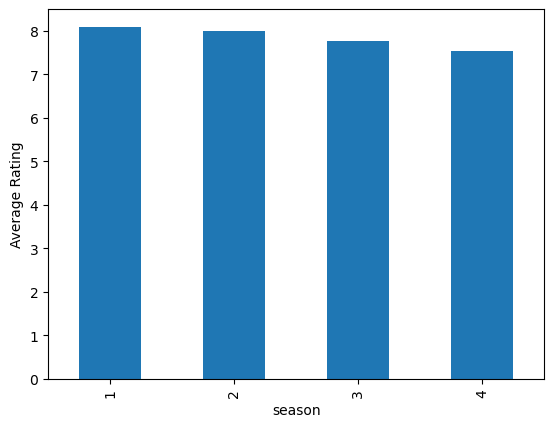

In [18]:
avg_rating_by_season = df.groupby('season')['average_rating'].mean()
avg_rating_by_season.plot(kind='bar')
plt.ylabel('Average Rating')
plt.show();

Get all the episode names, whose average rating is more than 8 for every season

In [19]:
df.loc[df['average_rating'] > 8, ['season', 'name']].groupby('season', as_index=False).agg({'name':lambda x: list(x)})

,season,name
0,1,"[Trompe L'Oeil, The Well-Tempered Clavier, The..."
1,2,"[Kiksuya, Vanishing Point, The Passenger]"


Get all the episode names that aired before May 2019

In [20]:
df.loc[(df['airdate'] < "2019-05-01"), 'name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

Get the episode name from each season with the highest and lowest rating

In [21]:
temp_df = df[['name', 'season', 'average_rating']].copy()
max_rating_by_season = df[['season', 'average_rating']].groupby('season', as_index=False).max()
min_rating_by_season = df[['season', 'average_rating']].groupby('season', as_index=False).min()
max_rating_df = max_rating_by_season.merge(right=temp_df, on=['season', 'average_rating'], how="inner").copy()
max_rating_df['rating_type'] = 'Max Rating'
min_rating_df = min_rating_by_season.merge(right=temp_df, on=['season', 'average_rating'], how="inner").copy()
min_rating_df['rating_type'] = 'Min Rating'
final_df = pd.concat([max_rating_df, min_rating_df], axis=0)
final_df.sort_values(by=['season', 'rating_type'], ascending=[True, False])

,season,average_rating,name,rating_type
0,1,7.6,The Stray,Min Rating
0,1,8.7,The Bicameral Mind,Max Rating
1,2,7.6,Akane No Mai,Min Rating
1,2,8.7,Kiksuya,Max Rating
2,3,7.5,Decoherence,Min Rating
3,3,7.5,Passed Pawn,Min Rating
2,3,8.0,Parce Domine,Max Rating
3,3,8.0,The Mother of Exiles,Max Rating
4,4,7.1,The Auguries,Min Rating
4,4,7.8,Zhuangzi,Max Rating


Get the summary for the most popular ( ratings ) episode in every season

In [22]:
temp_df = df[['summary', 'season', 'average_rating', 'name']].copy()
max_rating_by_season = df[['season', 'average_rating']].groupby('season', as_index=False).max()
max_rating_df = max_rating_by_season.merge(right=temp_df, on=['season', 'average_rating'], how="inner").copy()
max_rating_df[['name', 'summary']]

,name,summary
0,The Bicameral Mind,Delores finds out the truth about William's fa...
1,Kiksuya,Another of Westworld's Host revolutionaries is...
2,Parce Domine,"If you're stuck in a loop, try walking in a st..."
3,The Mother of Exiles,The truth doesn't always set you free.
4,Zhuangzi,God is bored.


In [26]:
# Q9

In [33]:
df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")

In [31]:
df.head().T

,0,1,2,3,4
VIN (1-10),5YJXCAE26J,JHMZC5F37M,5YJ3E1EB0K,1N4AZ0CP5D,5YJSA1E21H
County,Yakima,Kitsap,King,King,Thurston
City,Yakima,Poulsbo,Seattle,Seattle,Lacey
State,WA,WA,WA,WA,WA
Postal Code,98908.0,98370.0,98199.0,98119.0,98516.0
Model Year,2018,2021,2019,2013,2017
Make,TESLA,HONDA,TESLA,NISSAN,TESLA
Model,MODEL X,CLARITY,MODEL 3,LEAF,MODEL S
Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV),Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle Eligible


Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [40]:
df.loc[(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'), ['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,FUSION,Not eligible due to low battery range
7,AUDI,Q5 E,Not eligible due to low battery range
8,FORD,C-MAX,Not eligible due to low battery range
14,FORD,C-MAX,Not eligible due to low battery range
15,KIA,NIRO,Not eligible due to low battery range
...,...,...,...
130377,BMW,530E,Not eligible due to low battery range
130385,AUDI,A3,Not eligible due to low battery range
130390,JEEP,WRANGLER,Not eligible due to low battery range
130407,TOYOTA,PRIUS PRIME,Not eligible due to low battery range


Get all TESLA cars with the model year, and model type made in Bothell City.

In [41]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [46]:
df.loc[((df['Make'].str.lower() == "tesla") & (df['City'].str.lower() == "bothell")), ['Make', 'Model Year', 'Make', 'Model', 'City']]

,Make,Model Year,Make,Model,City
39,TESLA,2020,TESLA,MODEL 3,Bothell
217,TESLA,2022,TESLA,MODEL 3,Bothell
218,TESLA,2022,TESLA,MODEL Y,Bothell
222,TESLA,2018,TESLA,MODEL 3,Bothell
292,TESLA,2017,TESLA,MODEL X,Bothell
...,...,...,...,...,...
129778,TESLA,2019,TESLA,MODEL 3,Bothell
129954,TESLA,2021,TESLA,MODEL 3,Bothell
129976,TESLA,2014,TESLA,MODEL S,Bothell
130295,TESLA,2022,TESLA,MODEL 3,Bothell


Get all the cars that have an electric range of more than 100, and were made after
2015

In [48]:
df.loc[((df['Electric Range'] > 100) & (df['Model Year'] > 2015))]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


Draw plots to show the distribution between city and electric vehicle type

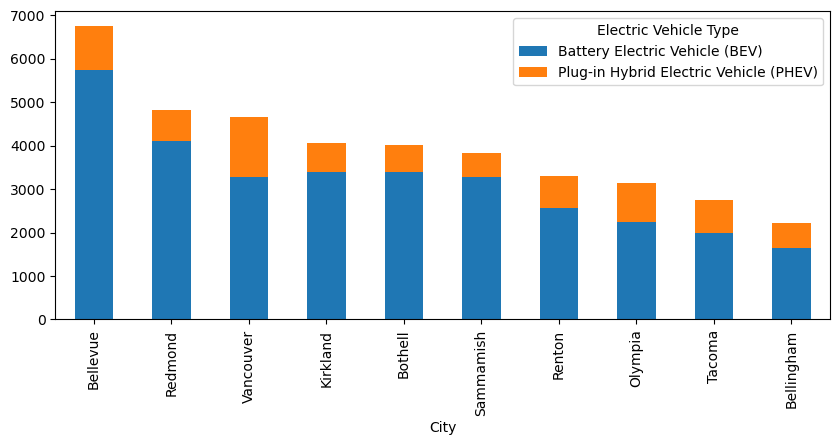

In [97]:
# SINCE THERE ARE MANY CITIES. ONLY PLOTTING TOP 10 BY ELECTRIC VEHICLE TYPE COUNT
ct = pd.crosstab(index=df['City'], columns=df['Electric Vehicle Type'], margins=True)
ct = ct.sort_values("All", ascending=False).reset_index()
ct = ct.loc[ct['City'] != "All"].copy()
ct.drop(columns=['All'], inplace=True)
top_10 = ct.iloc[1:11, :]
top_10.set_index('City', inplace=True)
top_10.plot(kind='bar', stacked=True, figsize=(10,4));

Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.

In [121]:
nlp = spacy.load('en_core_web_sm')
def get_pos_counts(s: str):
    doc = nlp(str(s))
    pos = [token.pos_ for token in doc]
    return dict(Counter(pos))

In [123]:
get_pos_counts("hi, how are you? I am good.")

{'PROPN': 1, 'PUNCT': 3, 'SCONJ': 1, 'AUX': 2, 'PRON': 2, 'ADJ': 1}